**CREDITOS OTORGADOS - PRODUBANCO (Grupos 2,4)**

En el ámbito financiero, la concesión de créditos es una de las actividades más importantes y a la vez, una de las más riesgosas para las instituciones. La capacidad de predecir y gestionar adecuadamente el riesgo crediticio es crucial para mantener la estabilidad financiera y minimizar las pérdidas. Este proyecto tiene como objetivo analizar el estatus de los créditos otorgados y determinar los factores que influyen en el incumplimiento de pago.
El análisis de datos históricos sobre la forma en que los créditos fueron otorgados y su posterior desempeño nos permitirá identificar patrones y tendencias en el comportamiento de los prestatarios. Con un enfoque centrado en la identificación de créditos que cayeron en vencimiento, este proyecto busca proporcionar una comprensión profunda de los factores que contribuyen a la morosidad.
**Tenemos datos completos de todos los préstamos emitidos entre 2007 y 2015, incluido el estado actual del préstamo (vigente, retrasado, totalmente pagado, etc.) y la última información de pago. Las características (también conocidas como variables) incluyen la puntuación crediticia, el número de consultas financieras, la dirección, incluidos los códigos postales y el estado, y los cobros, entre otros. El apartado de cobros indica si el cliente ha incumplido uno o más pagos y el equipo está intentando recuperar su dinero.
Produbanco, requiere del departamento de Business Intelligence analizar un grupo de creditos históricos. Asuma que el mes de análisis en marzo 2019 (fecha actual).**
Usted deberá cumplir con al menos los siguientes puntos:
Definición de mal pagador:
Crear una definición de ‘mal_pagador’. El dataset cuenta con varias columnas que hacen referencia los clientes que han tenido problemas de pagos. Analice y escoja una para crear la definición de mal pagador.
Ejemplo: Si supera mas de 15 dias vencido en x, mal pagador
Data quality:
Analice si existen valores duplicados, y si es así aborde el problema.
Analice si existen valores nulos, y si es así aborde el problema. Puede usar cualquiera de las alternativas que vimos en clase.
Si hay variables discretas que se encuentran como decimales, cámbielas a enteros. Por ejemplo, la edad en anos debe ser discreta.
Explore muy bien cuáles serían sus observaciones Válidas.
Feature transformation:
En este apartado usted deberá crear nuevas columnas apartir de las que tiene. Pueden ser:
Variables indicadores (1 si cumple x condición, 0 caso contrario)
Variables categóricas apartir de una variable nominal
Nuevas variables en funcion de otras, como por ejemplo ratios, vintage del cliente, etc..
Analisis correlacional:
Identifique si tiene variables correlacionadas
En caso de ser así, encuentre una explicación lógica para esa correlación. Si no encuentra un argumento, puede mencionarlo.
Análisis descriptivo:
Usando estatísticos descriptivos univariados, analice las variables que considere relevantes y aportan información.
Usando estatísticos descriptivos bivariados, analice las variables que considere relevantes y aportan información.
 Con variables categóricas, realice análisis con tablas cruzadas.
Es importante que cree preguntas de negocio y las responda cualquiera de los puntos 1,2,3. Por ejemplo:
Los clientes más jóvenes son los más riesgosos?
Los clientes más jóvenes que no tienen hijos, son más riesgosos?  
Es importante que siempre use su variable de interés(mal_pagador).
Por ejemplo: Los clientes que tienen mas de x años de vida son mas/menos propensos a ser malos pagadores …
	Es importante que use las variables que creó en Feature transformation
Es importante que use la mayor cantidad de visualizaciones posibles para los puntos     anteriores. Por ejemplo:
Diagrama de cajas y bigotes
Histogramas
Gráficos de dispersión
Gráficos pairplots
Conclusiones y Recomendaciones
En este apartado usted deberá sugerirle a la empresa a qué características tienen los clientes más riesgosos y cuáles podrían ser las futuras politicas de crédito para este producto. Además, de cómo se encuentra el sistema de cobranzas para los clientes con más problemas.

Entregables
Archivo notebook en donde se evidencie el desarrollo de cada uno de los puntos  que deberá subirse hasta enero 10 2024 en aula virtual.
Ppt o pdf que deberá subirse hasta el sábado 11. de enero en aula virtual.
BONUS: Los animamos a que creen un repositorio en github para su proyecto. No suban datos, solo el notebook y la presentación (ppt). Esto les permitirá ir construyendo su portafolio de proyectos.


#IMPORTACIÓN DE DATOS

In [ ]:
#Autorizar acceso a Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [ ]:
ruta='/content/drive/MyDrive/Colab Notebooks/Coding para procesamiento de datos/Proyecto/creditos_historicos.csv'


In [ ]:
data=pd.read_csv(ruta)

<ipython-input-5-256afd8ac4c4>:1: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(ruta)


In [ ]:
data

,id_cliente,loan_status,loan_amnt,installment,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,next_pymnt_d,earliest_cr_line,mths_since_last_delinq,total_pymnt,recoveries,collection_recovery_fee,last_pymnt_d,settlement_status,application_type,tot_hi_cred_lim
0,0,Current,2500,84.92,36 months,Chef,10+ years,RENT,55000.0,Not Verified,...,Mar-2019,Apr-2001,NaN,167.020000,0.0,0.0,Feb-2019,NaN,Individual,60124.0
1,1,Current,30000,777.23,60 months,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,...,Mar-2019,Jun-1987,71.0,1507.110000,0.0,0.0,Feb-2019,NaN,Individual,372872.0
2,2,Current,5000,180.69,36 months,Administrative,6 years,MORTGAGE,59280.0,Source Verified,...,Mar-2019,Apr-2011,NaN,353.890000,0.0,0.0,Feb-2019,NaN,Individual,136927.0
3,3,Current,4000,146.51,36 months,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,...,Mar-2019,Feb-2006,NaN,286.710000,0.0,0.0,Feb-2019,NaN,Individual,385183.0
4,4,Current,30000,731.78,60 months,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,...,Mar-2019,Dec-2000,NaN,1423.210000,0.0,0.0,Feb-2019,NaN,Individual,157548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,2260663,Current,12000,279.72,60 months,house keeper,10+ years,MORTGAGE,58000.0,Not Verified,...,Mar-2019,Jan-2004,NaN,5360.960000,0.0,0.0,Feb-2019,NaN,Individual,73948.0
2260664,2260664,Fully Paid,12000,358.01,60 months,Skilled Labor,< 1 year,MORTGAGE,30000.0,Not Verified,...,NaN,Mar-2003,13.0,14499.802172,0.0,0.0,Aug-2018,NaN,Joint App,382275.0
2260665,2260665,Current,10000,332.10,36 months,Teacher,10+ years,OWN,64000.0,Source Verified,...,Mar-2019,Feb-1995,NaN,5306.940000,0.0,0.0,Feb-2019,NaN,Individual,203417.0
2260666,2260666,Current,12000,327.69,60 months,NaN,NaN,RENT,60000.0,Not Verified,...,Mar-2019,Jul-2003,7.0,5207.290000,0.0,0.0,Feb-2019,NaN,Individual,118975.0


# Data Quality



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id_cliente               int64  
 1   loan_status              object 
 2   loan_amnt                int64  
 3   installment              float64
 4   term                     object 
 5   emp_title                object 
 6   emp_length               object 
 7   home_ownership           object 
 8   annual_inc               float64
 9   verification_status      object 
 10  purpose                  object 
 11  addr_state               object 
 12  delinq_2yrs              float64
 13  next_pymnt_d             object 
 14  earliest_cr_line         object 
 15  mths_since_last_delinq   float64
 16  total_pymnt              float64
 17  recoveries               float64
 18  collection_recovery_fee  float64
 19  last_pymnt_d             object 
 20  settlement_status        object 
 21  applicat

### LIMPIEZA DE DATOS

In [ ]:
data.isnull().sum()

,0
id_cliente,0
loan_status,0
loan_amnt,0
installment,0
term,0
emp_title,166969
emp_length,146907
home_ownership,0
annual_inc,4
verification_status,0


In [ ]:
# Vamos a imnputar con la mediana en los valores faltante de tot_hi_cred_lim, para no afectar el estudio ya que pueden haber valores aberrantes.
# Esto lo podemos puesto que el mínimo valor es 0 y el valor máximo es 9999999
data[['tot_hi_cred_lim']].describe()
percentil_50 = data['tot_hi_cred_lim'].quantile(0.50)
data['tot_hi_cred_lim'] = data['tot_hi_cred_lim'].fillna(percentil_50)


In [ ]:
# Dado que next_pymnt_d tiene más del 75% de datos faltantes, se procede a eliminar esta columna.
data = data.drop(columns=["next_pymnt_d"])

In [ ]:
# En la variable settlement_status imputamos nulos con el estado "sin problema" , ya que en esta variable los nulos indican que el banco no ha tenido problemas con ellos.
data['settlement_status'] = data['settlement_status'].fillna('sin problema')

In [ ]:
# Utilizamos la función lambda para poder imputar con la palabra "Garante" los valores nulos, es decir aquellos valores en los que los clientes no tenían profesion (existían nulos) y tampoco tenían datos en años en un trabajo (aquí también existían nulos).
data['emp_title'] = data.apply(lambda row: 'Garante' if pd.isnull(row['emp_title']) and pd.isnull(row['emp_length']) else row['emp_title'], axis=1)

In [ ]:
# Hacemos lo mismo pero en este caso asignamos los valores e "Garante" a los nulos de la variable emp_length.
data['emp_length'] = data.apply(lambda row: 'Garante' if row['emp_title']== 'Garante' and pd.isnull(row['emp_length']) else row['emp_length'], axis=1)

In [ ]:
# En la variable emp_title, si existen valores nulos se imputa con "< 1 year" (menos de un año).
# Por otro lado, si la variable emp_length tiene valores nulos, imputamos con "No Info".
data['emp_title'] = data.apply(lambda row: '< 1 year' if pd.isnull(row['emp_title']) and row['emp_length'] == '< 1 year' else ('No Info' if pd.isnull(row['emp_title']) and row['emp_length'] != '< 1 year' else row['emp_title']), axis=1)

In [ ]:
# Eliminaremos las variables delinq_2yrs y earliest_cr_line porque tienen nulos en el mismo código de clientes (id_cliente).
data = data.dropna(subset=['delinq_2yrs', 'earliest_cr_line'])

In [ ]:
#Imputamos con 0 en los nulos de la variable mths_since_last_delinq.
# Si el valor de la variable es igual a 0, el cliente no ha caído en mora. Por otro lado, si el valor de la variable es distinto a 0, imputamos con la mediana.
median_mths_since_last_delinq = data['mths_since_last_delinq'].median()
# Use a lambda function to fill missing values in 'mths_since_last_delinq'
data['mths_since_last_delinq'] = data.apply(lambda row: 0 if pd.isnull(row['mths_since_last_delinq']) and row['delinq_2yrs'] == 0 else (median_mths_since_last_delinq if pd.isnull(row['mths_since_last_delinq']) and row['delinq_2yrs'] != 0 else row['mths_since_last_delinq']), axis=1)

In [ ]:
# Imputamos los nulos de la variable emp_length con la moda.
mode_emp_length = data['emp_length'].mode()[0]
data['emp_length'] = data['emp_length'].fillna(mode_emp_length)

In [ ]:
# Eliminamos valores cuando en la columna "last_pymnt_d" exista un valor faltante y  en la columna loan_status encontremos el estado de charged off
data = data[~((data['last_pymnt_d'].isnull()) & (data['loan_status'] == 'Charged Off'))]

In [ ]:
#No encontramos razon para justificar los faltantes y, al ser pocos datos en comparación a la data total, decidimos eliminarlos.
data = data.dropna(subset=['last_pymnt_d'])

In [ ]:
def cat(valor):
  if valor <= 2.0 :
    return "Bajo"
  elif valor <=24.0 :
    return "Alto"
  else:
    return "Erroneo"

In [ ]:
data['retrasos']=data['delinq_2yrs'].apply(lambda x: cat(x))
data['retrasos'].value_counts()

,count
retrasos,
Bajo,2199410
Alto,58786
Erroneo,17


In [ ]:
# Eliminamos las filas donde 'retrasos' es "Erróneo"
data = data[data['retrasos'] != 'Erroneo']

In [ ]:
data['retrasos'].value_counts()

,count
retrasos,
Bajo,2199410
Alto,58786


#Definiendo al Mal Pagador


In [ ]:

print(len(data['id_cliente'].unique()))

2258196


In [ ]:

print(data['loan_status'].value_counts())

loan_status
Fully Paid                                             1041945
Current                                                 919688
Charged Off                                             259393
Late (31-120 days)                                       21743
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1962
Does not meet the credit policy. Status:Charged Off        746
Default                                                     30
Name: count, dtype: int64


In [ ]:
def cat2(valor):
  if valor in ('Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)', 'Default'):
    return "Categoria 2"
  else:
    return "Categoria 1"

In [ ]:
data['categoria']=data['loan_status'].apply(lambda x: cat2(x))

In [ ]:
data['categoria'].value_counts()

,count
categoria,
Categoria 1,1976284
Categoria 2,281912


In [ ]:
# Calculamos el porcentaje de categoria 1 y categoria 2 con respecto a la data total

category_counts = data['categoria'].value_counts(normalize=True) * 100
category_counts

,proportion
categoria,
Categoria 1,87.516053
Categoria 2,12.483947


**Data total: 2260668 Procedemos a limpiar la data,consideramos a los categoria 2 , 281912 como malos clientes.

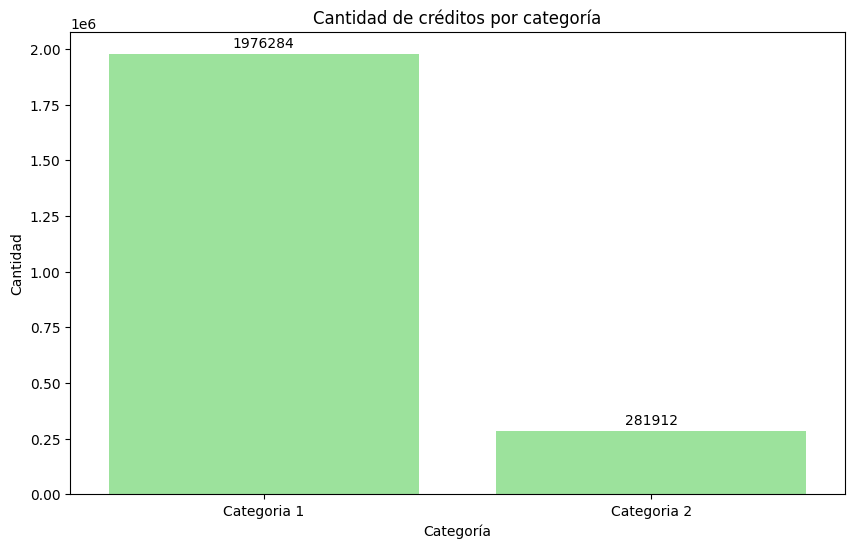

In [ ]:

categoria_counts = data['categoria'].value_counts()

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=categoria_counts.index, y=categoria_counts.values, color="lightgreen")

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.title("Cantidad de créditos por categoría")
plt.show()

### Categoria de Ingresos en base a Annual Income

In [ ]:
# Calculamos los diversos cuartiles de annual_inc
first_quartile = data['annual_inc'].quantile(0.25)
second_quartile = data['annual_inc'].quantile(0.50)
third_quartile = data['annual_inc'].quantile(0.75)

data['cat_ingresos'] = data['annual_inc'].apply(lambda x: 'INGRESOS BAJOS' if x < first_quartile else ('INGRESO MEDIO' if x < second_quartile else ('INGRESO ALTO' if x > third_quartile else 'INGRESO MEDIO')))

In [ ]:
print(first_quartile)
print(second_quartile)
print(third_quartile)

46000.0
65000.0
93000.0


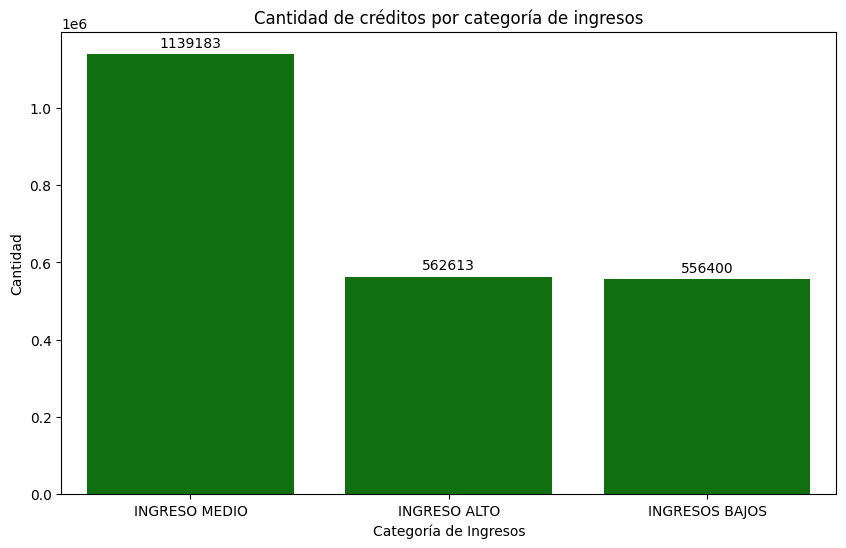

In [ ]:

cat_ingresos_counts = data['cat_ingresos'].value_counts()

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=cat_ingresos_counts.index, y=cat_ingresos_counts.values, color="green")

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Categoría de Ingresos")
plt.ylabel("Cantidad")
plt.title("Cantidad de créditos por categoría de ingresos")
plt.show()

In [ ]:
data['meses'] = data['term'].apply(lambda x: 36 if x == ' 36 months' else 60 if x == ' 60 months' else None)
data['meses'] = pd.to_numeric(data['meses'], errors='coerce')


In [ ]:
data['Total_a_pagar'] = data['installment'] * data['meses']

In [ ]:
data['SaldoPrestamo'] = data['Total_a_pagar'] - data['total_pymnt']

#Analisis correlacional:

Identifique si tiene variables correlacionadas
En caso de ser así, encuentre una explicación lógica para esa correlación. Si no encuentra un argumento, puede mencionarlo.


In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = data[["loan_amnt","installment","annual_inc","delinq_2yrs","tot_hi_cred_lim","mths_since_last_delinq","total_pymnt","recoveries","collection_recovery_fee",]].corr()
print(correlation_matrix)

                         loan_amnt  installment  annual_inc  delinq_2yrs  \
loan_amnt                 1.000000     0.945625    0.197169    -0.009338   
installment               0.945625     1.000000    0.190205     0.002069   
annual_inc                0.197169     0.190205    1.000000     0.026269   
delinq_2yrs              -0.009338     0.002069    0.026269     1.000000   
tot_hi_cred_lim           0.333874     0.298302    0.263919     0.058298   
mths_since_last_delinq   -0.021224    -0.013375    0.012555    -0.068907   
total_pymnt               0.651883     0.650973    0.136715     0.015776   
recoveries                0.120675     0.118311    0.009744     0.016528   
collection_recovery_fee   0.115327     0.113294    0.009831     0.016864   

                         tot_hi_cred_lim  mths_since_last_delinq  total_pymnt  \
loan_amnt                       0.333874               -0.021224     0.651883   
installment                     0.298302               -0.013375     0.650973

1.  Installment y loanamnt ( 0.94 ) - Numero de cuotas y monto del prestamo, mientras mayor sea el monto prestado, mayor van a ser las cuotas a pagar.Tiene sentido en base a los plazos de pago

2.  Total_pymnt y loan_amnt ( 0.64 ) - Pago de la cuota y monto del prestamo, esto hay que analizarlo con un grafico, pero si tenemos altos montos prestados, asi mismo tendremos valores pagados totales.

3.  Total_pymnt y installment ( 0.62) - Pago de la cuota del proveedor y numero de cuotas. Entre mayor sean las cuotas de pago, mayor la cantidad total pagada.

4.  Collection_recovery_fee y recoveries ( 0.9731 ) Si es mayor el monto recuperado del prestamo, asi mismo sera el impuesto o costo por recuperar ese valor.



KeyboardInterrupt: 

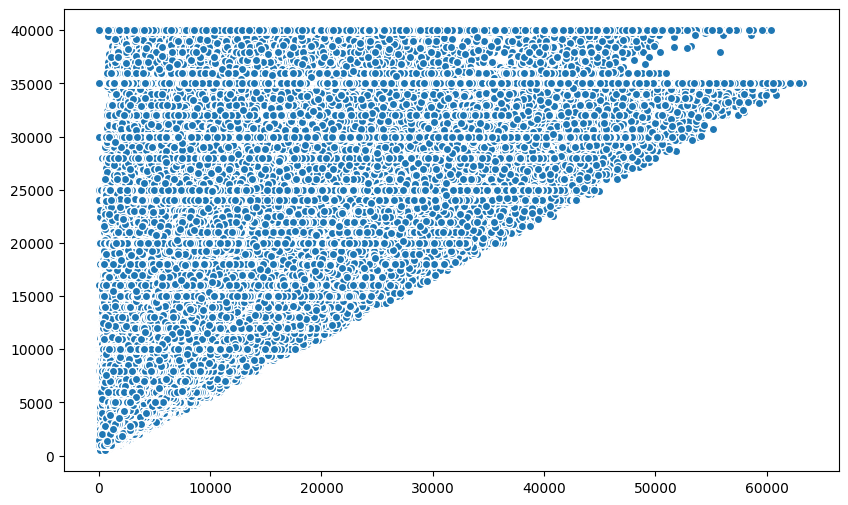

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_pymnt', y='loan_amnt', hue='categoria', data=data)
plt.title('Correlation between total_pymnt and loan_amnt by Category')
plt.xlabel('Total Payment')
plt.ylabel('Loan Amount')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collection_recovery_fee', y='recoveries', hue='categoria', data=data)
plt.title('Correlation between collection_recovery_fee and recoveries by Category')
plt.xlabel('collection_recovery_fee')
plt.ylabel('recoveries')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_pymnt', y='installment', hue='cat_ingresos', data=data)
plt.title('Correlación entre total_pymnt e installment por categoría')
plt.xlabel('total_pymnt')
plt.ylabel('installment')
plt.show()

In [ ]:
correlation_matrix = data[["delinq_2yrs","annual_inc"]].corr()
print(correlation_matrix)

In [ ]:
correlation_matrix = data[["loan_amnt","installment",]].corr()
print(correlation_matrix)

In [ ]:
correlation_matrix = data[["loan_amnt","total_pymnt",]].corr()
print(correlation_matrix)

In [ ]:
correlation_matrix = data[["collection_recovery_fee","recoveries",]].corr()
print(correlation_matrix)

#Análisis descriptivo:
      

In [ ]:
pd.crosstab(data['emp_title'], data['categoria'], normalize="index").sort_values(by='Categoria 2', ascending=False)*100

categoria,Categoria 1,Categoria 2
emp_title,,
PHENIX MUTUAL FIRE INSURANCE CO,0.0,100.0
VP Chief Human Resources Officer,0.0,100.0
Cut/grinding operator,0.0,100.0
Lead Corporate Advisor,0.0,100.0
Cut saw,0.0,100.0
...,...,...
Hosptial Housekeeping Sytems,100.0,0.0
Hosptial Director,100.0,0.0
Hosptal Services Tech II,100.0,0.0


según la tabla las probabilidades de que los trabajan en PHENIX MUTUAL FIRE INSURANCE Co( compañía de seguros), sea vicepresidente de recursos humanos y operador de cortes industriales sean malos pagadores es del 100%

In [ ]:
# emplength y categoria
pd.crosstab(data['emp_length'], data['categoria'],normalize='index').sort_values(by='Categoria 2', ascending=False)*100

categoria,Categoria 1,Categoria 2
emp_length,,
Garante,84.953210,15.046790
8 years,86.312338,13.687662
9 years,86.729290,13.270710
7 years,86.952436,13.047564
1 year,87.051490,12.948510
3 years,87.472721,12.527279
2 years,87.541594,12.458406
5 years,87.596227,12.403773
6 years,87.613538,12.386462


Analizando los datos, los clientes que hayan solicitado un prestamo con Garante tienen un probabilidad del 15.04% de ser malos pagadores,representando el riesgo más alto.Seguidos por antigüedad laboral de 8 years, 9 years, y 7 years.

In [ ]:
pd.crosstab(data['application_type'], data['categoria'],normalize='index').sort_values(by='Categoria 2', ascending=False)*100

categoria,Categoria 1,Categoria 2
application_type,,
Individual,87.176135,12.823865
Joint App,93.542047,6.457953


Los clientes que solicitan prestamos en individuales tienen una mayor probabilidad de que caer en morosidad con 12% sobre el 6% de las solicitudes grupales

In [ ]:
pd.crosstab(data['cat_ingresos'], data['categoria'],normalize='index').sort_values(by='Categoria 2', ascending=False)*100

categoria,Categoria 1,Categoria 2
cat_ingresos,,
INGRESOS BAJOS,85.301941,14.698059
INGRESO MEDIO,87.234536,12.765464
INGRESO ALTO,90.275731,9.724269


Los clientes con ingresos bajos (ingreso anual hasta USD 46000.0) son más propensos a ser malos pagadores con una probabilidad de 15%

In [ ]:
categorical_vars = ['loan_status', 'verification_status', 'term', 'addr_state', 'categoria']

def create_crosstabs(data, variables):
    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            print(f"\nCrosstab entre {variables[i]} y {variables[j]}")
            crosstab = pd.crosstab(data[variables[i]], data[variables[j]], normalize='index')  # Normalizar por filas
            print(crosstab * 100)

create_crosstabs(data, categorical_vars)


Crosstab entre loan_status y verification_status
verification_status                                 Not Verified  \
loan_status                                                        
Charged Off                                            22.037218   
Current                                                37.156840   
Default                                                23.333333   
Does not meet the credit policy. Status:Charged...     67.158177   
Does not meet the credit policy. Status:Fully Paid     66.004077   
Fully Paid                                             32.103902   
In Grace Period                                        25.636729   
Late (16-30 days)                                      27.160824   
Late (31-120 days)                                     26.054362   

verification_status                                 Source Verified   Verified  
loan_status                                                                     
Charged Off                            

In [ ]:
pd.crosstab(data['settlement_status'], data['categoria'], normalize='index') * 100

categoria,Categoria 1,Categoria 2
settlement_status,,
ACTIVE,0.284168,99.715832
BROKEN,0.042427,99.957573
COMPLETE,0.000000,100.000000
sin problema,88.810874,11.189126


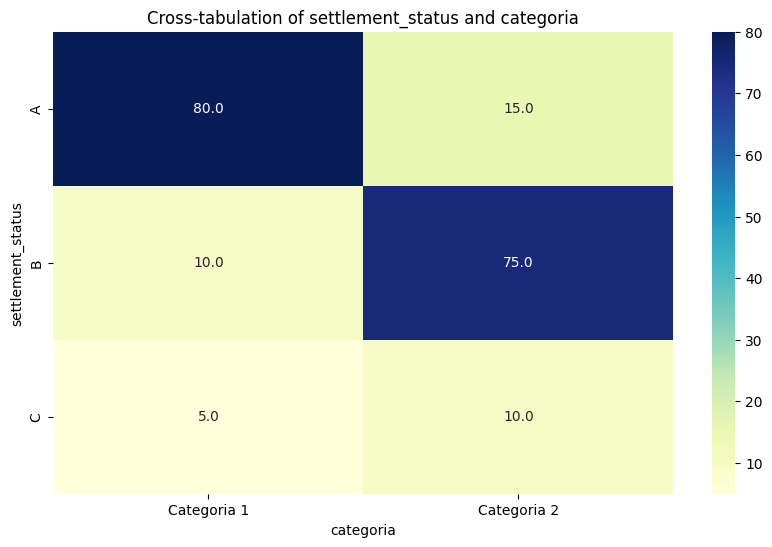

In [ ]:
import pandas as pd
crosstab_result = pd.DataFrame({
    'Categoria 1': [80, 10, 5],
    'Categoria 2': [15, 75, 10],
}, index=['A', 'B', 'C'])

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Cross-tabulation of settlement_status and categoria")
plt.xlabel("categoria")
plt.ylabel("settlement_status")
plt.show()

ESTADO ACTIVO:

ESTADO ACTIVO: El 99.72% de los clientes activos pertenecen a la Categoría 2 (malos clientes Solo el 0.28% de los clientes activos son buenos clientes (Categoría 1). Esto indica que la mayoría de los clientes con estado activo están relacionados con problemas de pago.
ESTADO BROKEN: Un 99.96% de los clientes con estatus de incumplimiento pertenecen a la Categoría 2. Solo un 0.04% de estos clientes son considerados buenos. Este estado está casi exclusivamente asociado con malos pagadores.
ESTADO COMPLETE: El 100% de los clientes con estado completado pertenecen a la Categoría 2. No hay clientes buenos (Categoría 1) en este grupo, lo que podría reflejar que quienes completaron el proceso ya fueron considerados malos pagadores en algún momento.
ESTADO SIN PROBLEMA El 88.81% de los clientes sin problemas pertenecen a la Categoría 1 (buenos clientes). El 11.19% pertenecen a la Categoría 2 (malos clientes). La mayoría de los clientes sin problemas son buenos, pero aún existe un pequeño porcentaje con historial de problemas.
ES DECIR: Los estados ACTIVE, BROKEN y COMPLETE están altamente asociados con malos clientes. El estado SIN PROBLEMA está mayormente asociado con buenos clientes, pero con un 11.19% que muestra riesgo.

## Variables numericas.






## Revision de Annual_inc

count    2.258196e+06
mean     7.799615e+04
std      1.127418e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

Number of outliers in 'annual_inc': 109905

Outliers:
9          300000.0
39         171000.0
55         500000.0
98         200000.0
114        240000.0
             ...   
2260445    170000.0
2260483    165000.0
2260545    275000.0
2260546    170000.0
2260577    189000.0
Name: annual_inc, Length: 109905, dtype: float64


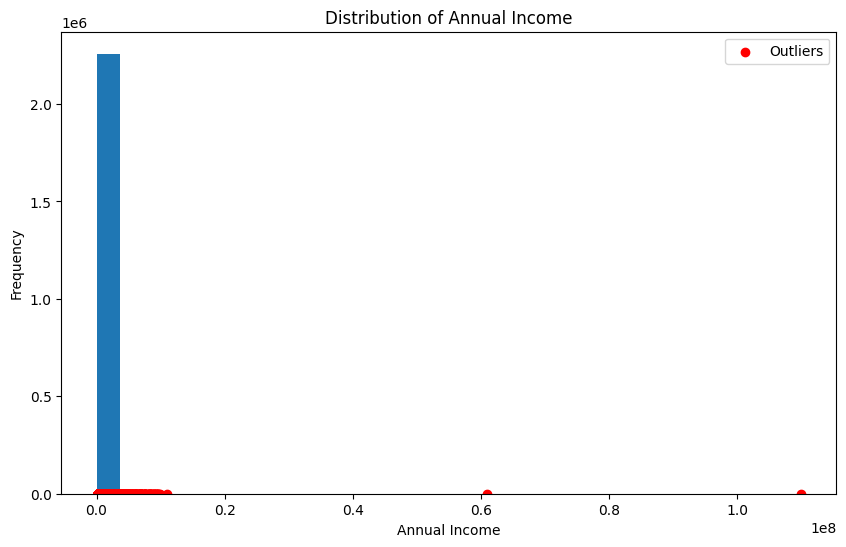

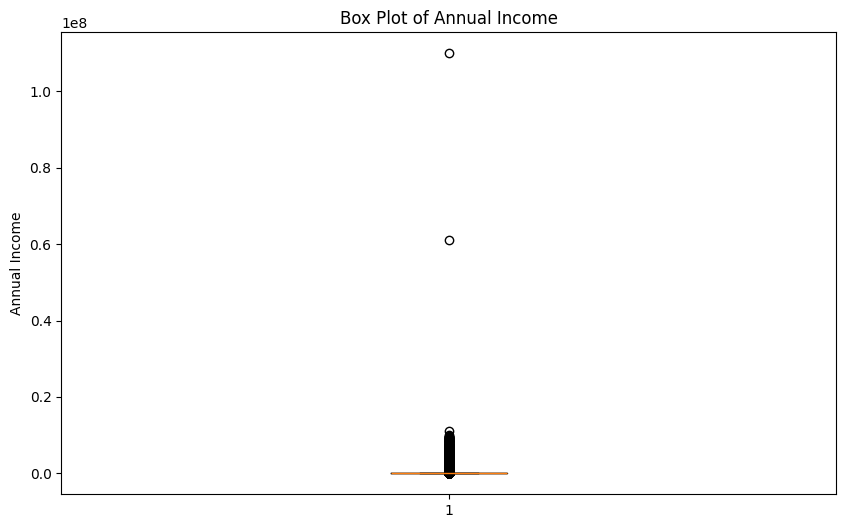

In [ ]:
# Revisamos los valores aberrantes de la variable annual_inc en el dataset

annual_inc_description = data['annual_inc'].describe()
print(annual_inc_description)

Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['annual_inc'] < lower_bound) | (data['annual_inc'] > upper_bound)]
print("\nNumber of outliers in 'annual_inc':", len(outliers))
print("\nOutliers:")
print(outliers['annual_inc'])

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['annual_inc'], bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.scatter(outliers['annual_inc'], [1] * len(outliers), color='red', label='Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(data['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
data['annual_inc'].value_counts()

,count
annual_inc,
60000.00,87103
50000.00,76263
65000.00,64836
70000.00,62027
80000.00,59766
...,...
18280.00,1
107895.48,1
47501.00,1


In [ ]:
data['categoria'].value_counts()

,count
categoria,
Categoria 1,1976284
Categoria 2,281912


In [ ]:
outcat2 = data[data['categoria'] == 'Categoria 1']
outcat2['emp_title'].value_counts()

,count
emp_title,
Garante,123917
Teacher,34614
Manager,29955
Owner,19013
Registered Nurse,14084
...,...
Technical Security Specialist,1
Director of Labor Participation,1
Jr. Pricing Analyst,1


In [ ]:
outcat2 = outliers[outliers['categoria'] == 'Categoria 2']
outcat2['emp_title'].value_counts()
empleo = outcat2[(outcat2['emp_title']=='Director') & (outcat2['delinq_2yrs']==3)]
empleo
#empleo['delinq_2yrs'].value_counts()

NameError: name 'outliers_dataset' is not defined

## Analisis Variables Numericas


Análisis univariado para: mths_since_last_delinq
count    2.258196e+06
mean     1.690852e+01
std      2.306163e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.100000e+01
max      2.260000e+02
Name: mths_since_last_delinq, dtype: float64


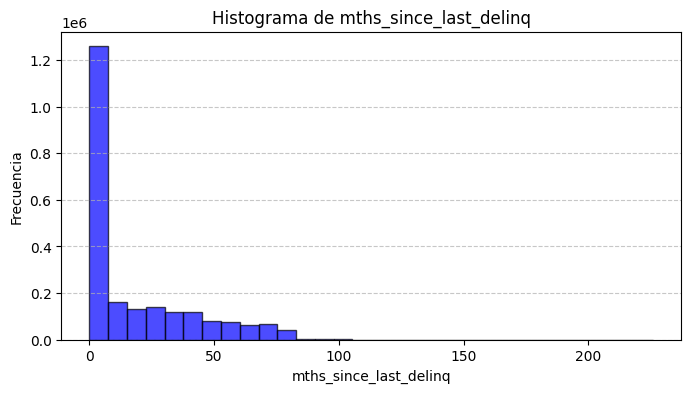

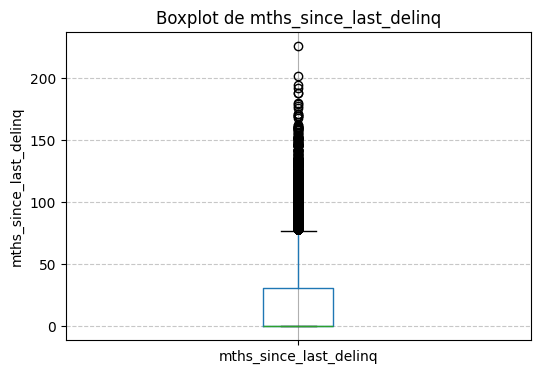


Análisis univariado para: tot_hi_cred_lim
count    2.258196e+06
mean     1.762881e+05
std      1.790928e+05
min      0.000000e+00
25%      5.201700e+04
50%      1.142985e+05
75%      2.522510e+05
max      9.999999e+06
Name: tot_hi_cred_lim, dtype: float64


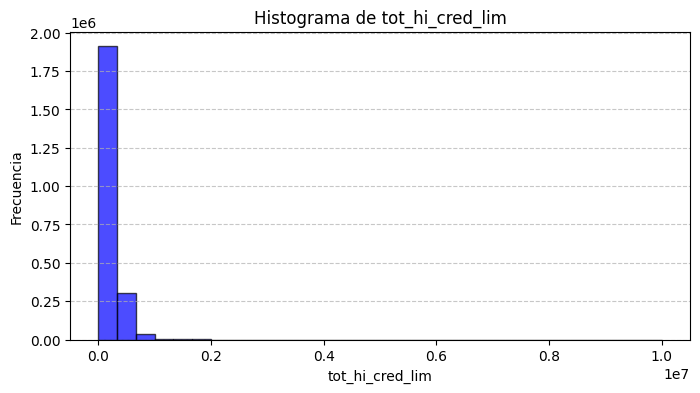

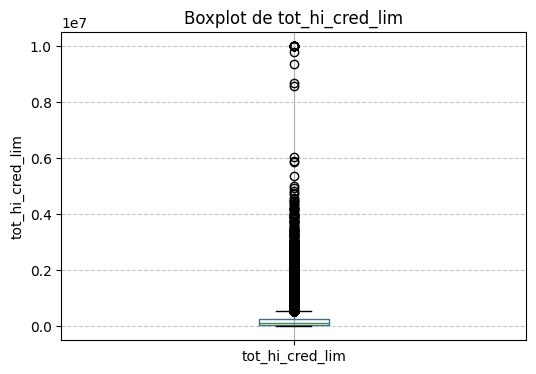

In [ ]:
# Análisis univariado para mths_since_last_delinq y tot_hi_cred_lim

def univariate_analysis(data, variables):
    for var in variables:
        print(f"\nAnálisis univariado para: {var}")
        print(data[var].describe())

        # Histograma
        plt.figure(figsize=(8, 4))
        data[var].plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f"Histograma de {var}")
        plt.xlabel(var)
        plt.ylabel('Frecuencia')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Boxplot
        plt.figure(figsize=(6, 4))
        data.boxplot(column=var)
        plt.title(f"Boxplot de {var}")
        plt.ylabel(var)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

variables_numericas = ['mths_since_last_delinq', 'tot_hi_cred_lim']
univariate_analysis(data, variables_numericas)

La conclusión más relevante de este análisis es que tenemos como fecha de última morosidad fechas muy recientes, lo que indica que tenemos pagadores con deudas actuales vigentes, por este motivo necesitan una mayor atención antes de una futura concesión de crédito.
Por otro lado, vemos que el número de incidencias disminuye si vemos algunos meses más atrás, sin embargo esto indica que tenemos clientes que tienen deudas pendientes de un lapso de tiempo que va de meses hasta años.


Análisis bivariado: Correlaciones entre variables numéricas
                        mths_since_last_delinq  tot_hi_cred_lim
mths_since_last_delinq                1.000000         0.005916
tot_hi_cred_lim                       0.005916         1.000000


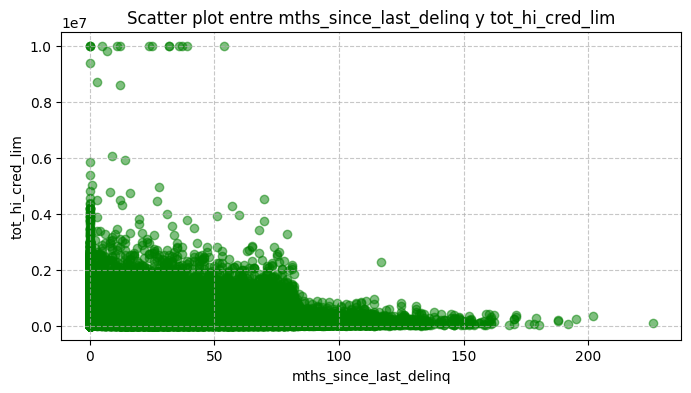

<Figure size 1000x600 with 0 Axes>

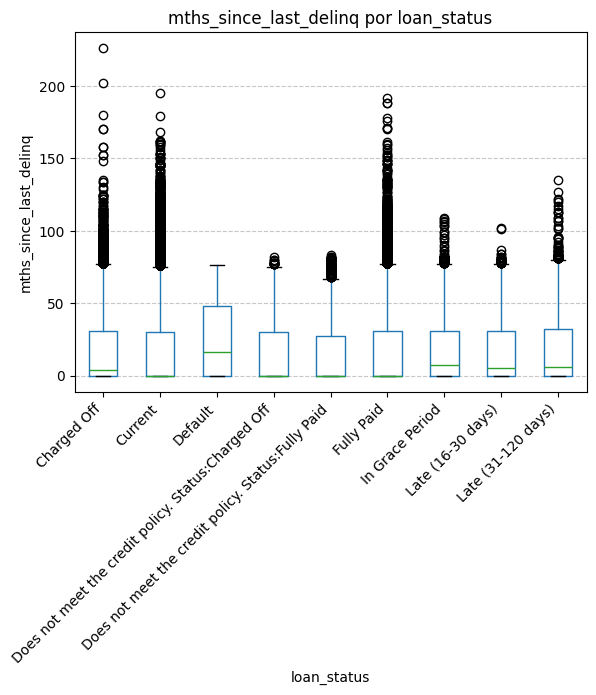

<Figure size 1000x600 with 0 Axes>

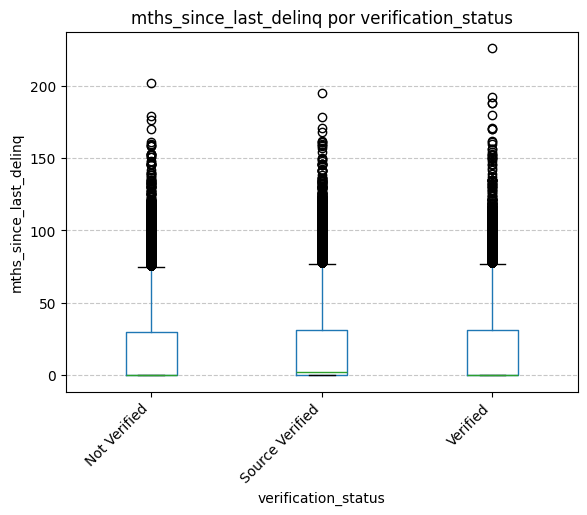

<Figure size 1000x600 with 0 Axes>

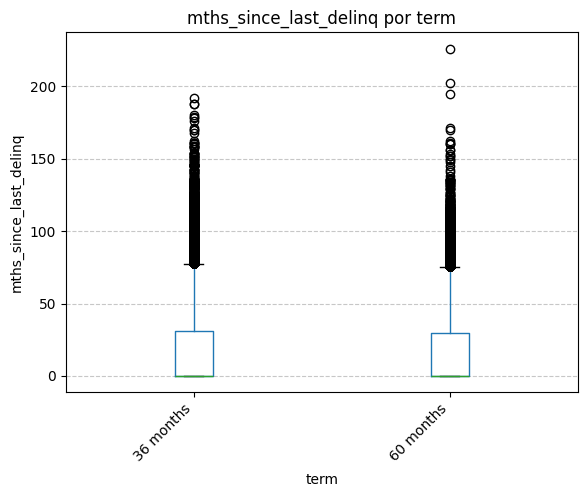

<Figure size 1000x600 with 0 Axes>

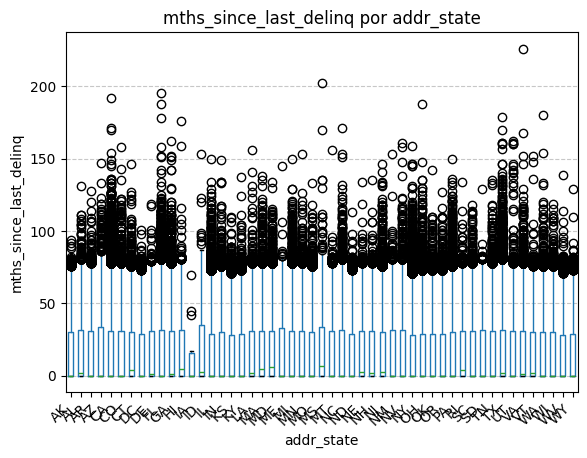

<Figure size 1000x600 with 0 Axes>

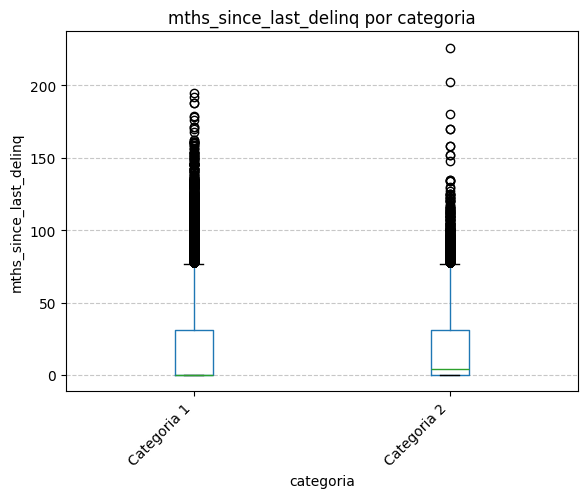

<Figure size 1000x600 with 0 Axes>

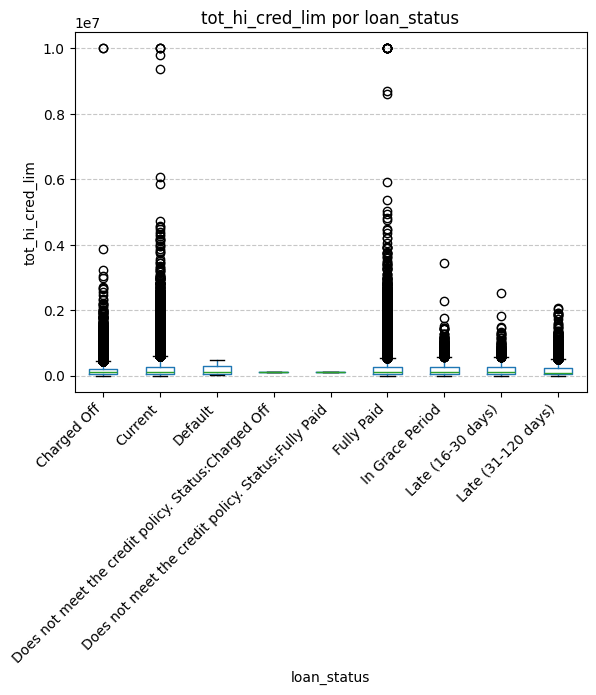

<Figure size 1000x600 with 0 Axes>

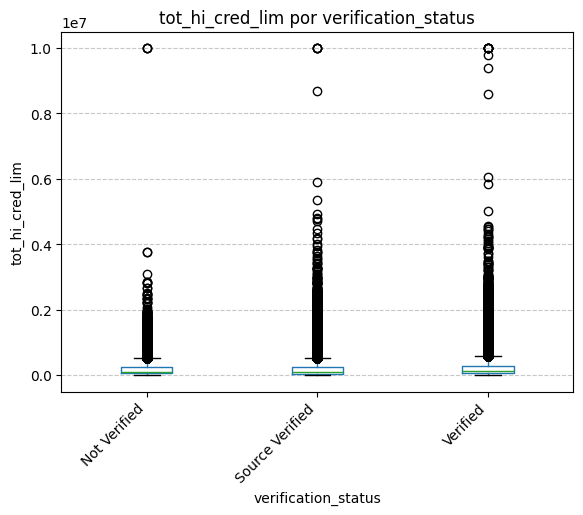

<Figure size 1000x600 with 0 Axes>

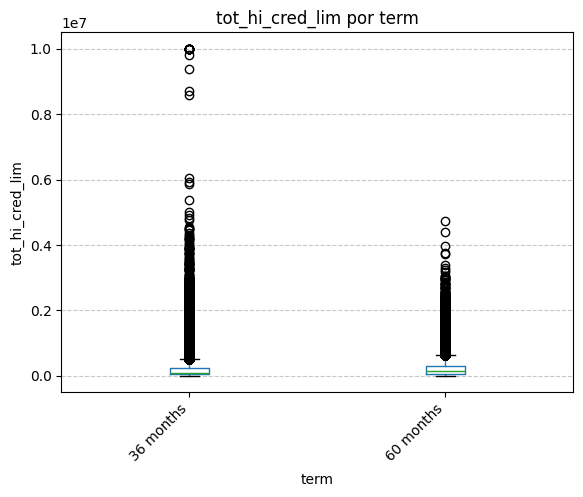

<Figure size 1000x600 with 0 Axes>

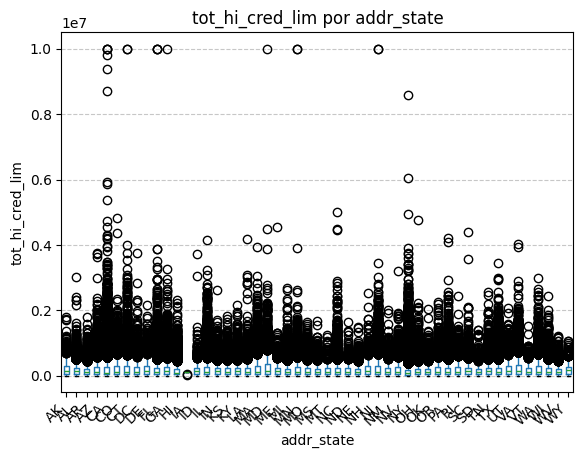

<Figure size 1000x600 with 0 Axes>

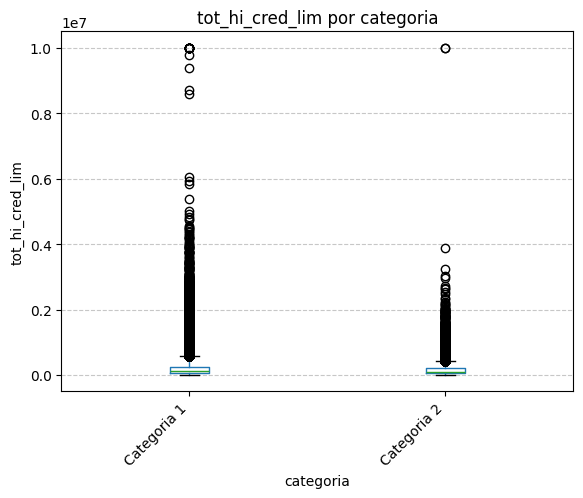

In [ ]:
#Análisis Bivariado

def bivariate_analysis(data, num_vars, cat_vars):
    print("\nAnálisis bivariado: Correlaciones entre variables numéricas")
    print(data[num_vars].corr())


    for i in range(len(num_vars)):
        for j in range(i + 1, len(num_vars)):
            plt.figure(figsize=(8, 4))
            plt.scatter(data[num_vars[i]], data[num_vars[j]], alpha=0.5, color='green')
            plt.title(f"Scatter plot entre {num_vars[i]} y {num_vars[j]}")
            plt.xlabel(num_vars[i])
            plt.ylabel(num_vars[j])
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.show()

    for num_var in num_vars:
        for cat_var in cat_vars + ['categoria']:
            plt.figure(figsize=(10, 6))
            data.boxplot(column=num_var, by=cat_var, grid=False)
            plt.title(f"{num_var} por {cat_var}")
            plt.suptitle("")
            plt.xlabel(cat_var)
            plt.ylabel(num_var)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=45, ha='right')  # Función que nos ayuda a rotar etiquetas del eje x para mejor legibilidad
            plt.show()



num_vars = ['mths_since_last_delinq', 'tot_hi_cred_lim']
cat_vars = ['loan_status', 'verification_status', 'term', 'addr_state']
bivariate_analysis(data, num_vars, cat_vars)

In [ ]:
categorical_vars = ['loan_status', 'verification_status', 'term', 'addr_state', 'categoria']

def create_crosstabs(data, variables):
    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            print(f"\nCrosstab entre {variables[i]} y {variables[j]}")
            crosstab = pd.crosstab(data[variables[i]], data[variables[j]], normalize='index')
            # Multiplicamos por 100 y formateamos como porcentajes con dos decimales
            crosstab = (crosstab * 100).applymap(lambda x: f'{x:.2f}%')
            print(crosstab)


create_crosstabs(data, categorical_vars)

In [ ]:
data[["loan_amnt","annual_inc"]].describe().round(2)

,loan_amnt,annual_inc
count,2258196.00,2.258196e+06
mean,15047.18,7.799615e+04
std,9188.71,1.127418e+05
min,500.00,0.000000e+00
25%,8000.00,4.600000e+04
50%,12925.00,6.500000e+04
75%,20000.00,9.300000e+04
max,40000.00,1.100000e+08


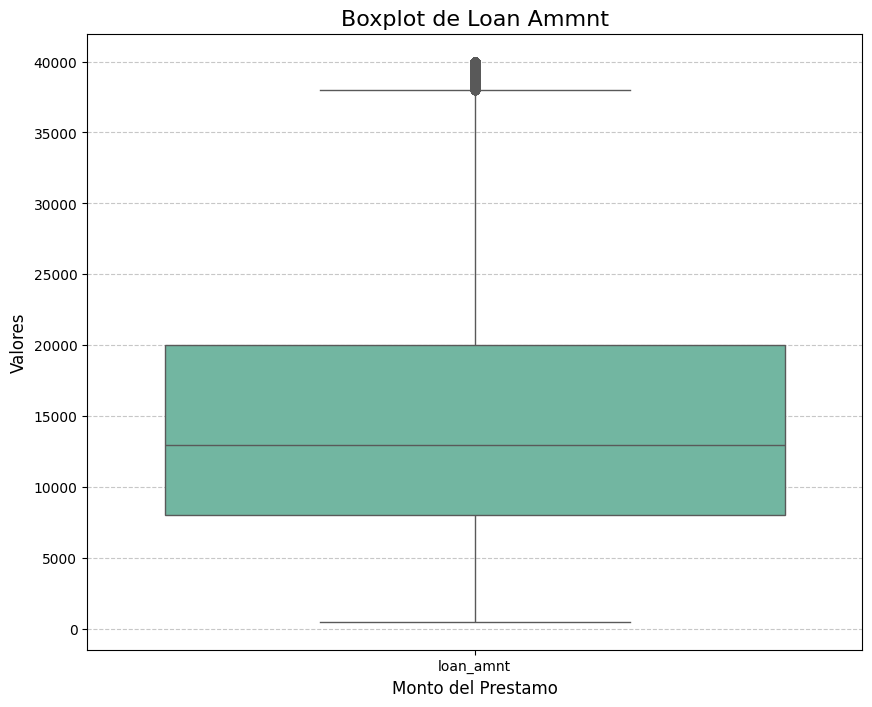

In [ ]:
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.boxplot(data=data[["loan_amnt"]], palette="Set2")

# Personalización del gráfico
plt.title("Boxplot de Loan Ammnt", fontsize=16)

plt.ylabel("Valores", fontsize=12)
plt.xlabel("Monto del Prestamo", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


El boxplot muestra la distribución de las cantidades de préstamos otorgados por el banco. La mediana se encuentra cerca de los  USD 10,000. El 50% de los prestamos abarca desde aproximadamente  USD 8,000 hasta USD 20,000. Sin embargo, se observan valores atípicos que superan los USD 40,000, estos podrian ser préstamos excepcionales significativamente mayores al promedio

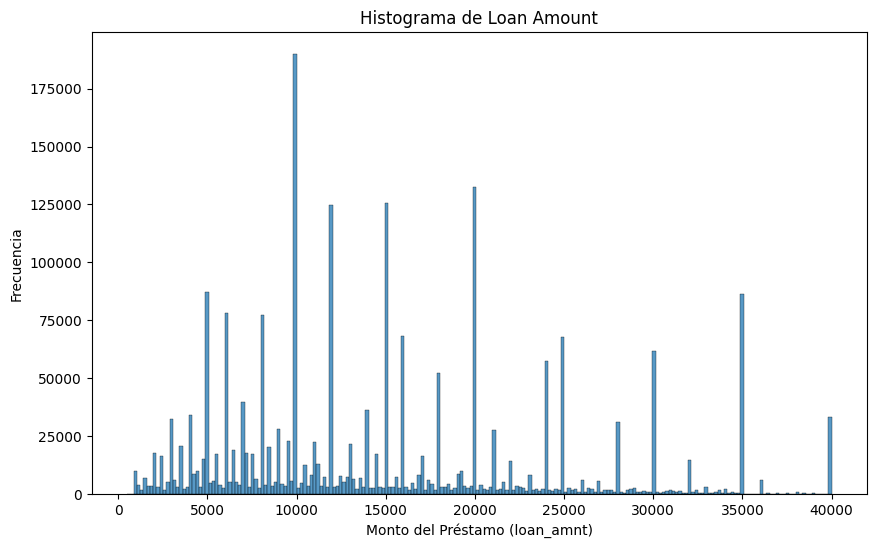

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt'])
plt.title('Histograma de Loan Amount')
plt.xlabel('Monto del Préstamo (loan_amnt)')
plt.ylabel('Frecuencia')
plt.show()

<Figure size 1200x800 with 0 Axes>

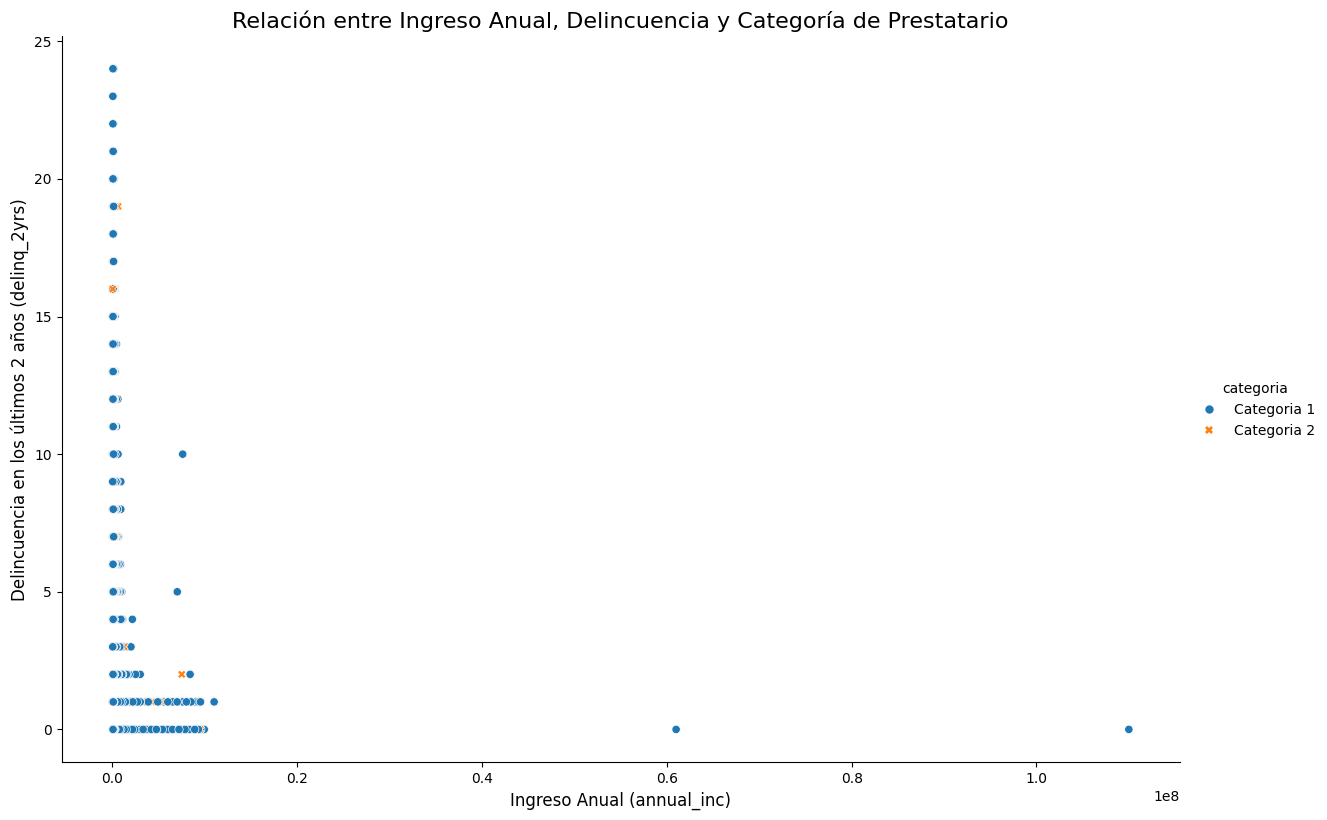

In [ ]:
plt.figure(figsize=(12, 8))
sns.relplot(x="annual_inc", y="delinq_2yrs", hue="categoria", style="categoria", data=data, height=8, aspect=1.5) # Increased height and aspect
plt.title('Relación entre Ingreso Anual, Delincuencia y Categoría de Prestatario', fontsize=16) # Added title
plt.xlabel('Ingreso Anual (annual_inc)', fontsize=12) #Added xlabel
plt.ylabel('Delincuencia en los últimos 2 años (delinq_2yrs)', fontsize=12) # Added ylabel
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
correlation_coefficient, p_value = pearsonr(data['loan_amnt'], data['installment'])

print(f"Correlation coefficient between loan_amnt and installment: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient between loan_amnt and installment: 0.9456247134839696
P-value: 0.0


<Figure size 1500x1000 with 0 Axes>

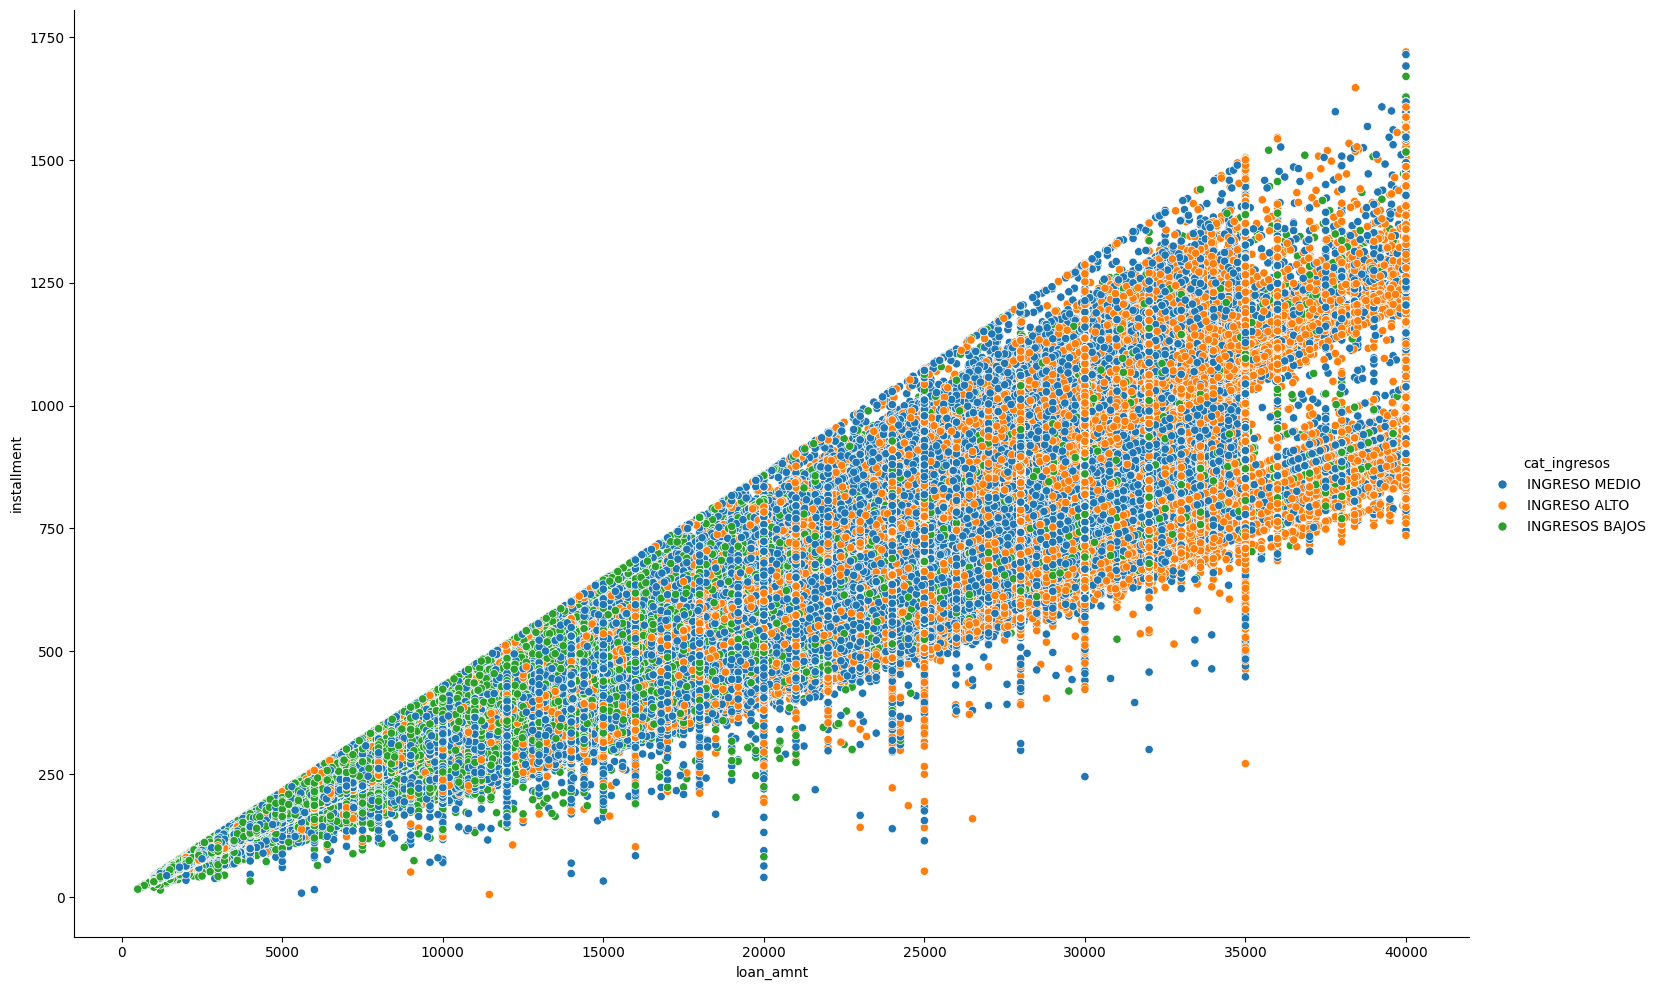

In [ ]:
plt.figure(figsize=(15, 10))
sns.relplot(x="loan_amnt", y="installment", hue="cat_ingresos", data=data, height=10, aspect=1.5) # set height and aspect for better visualization
plt.show()

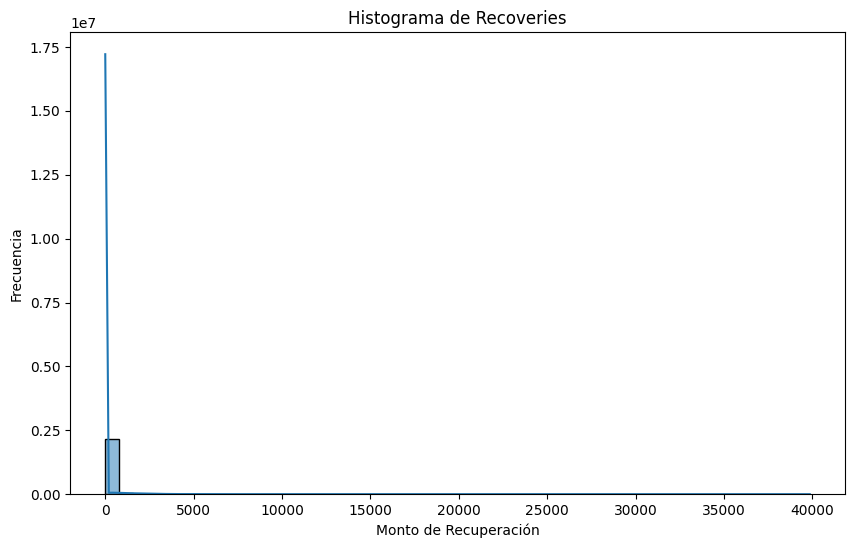

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['recoveries'], bins=50, kde=True)
plt.title('Histograma de Recoveries')
plt.xlabel('Monto de Recuperación')
plt.ylabel('Frecuencia')
plt.show()

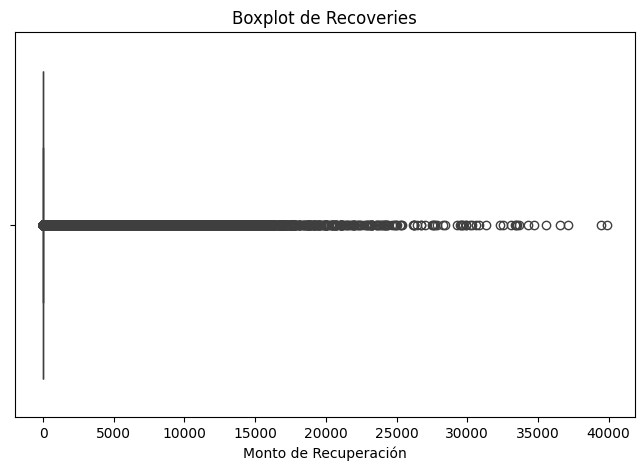

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['recoveries'])
plt.title('Boxplot de Recoveries')
plt.xlabel('Monto de Recuperación')
plt.show()

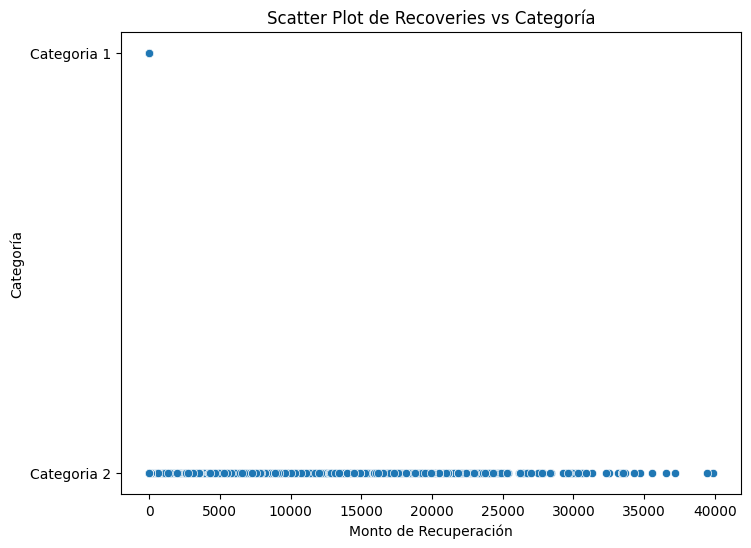

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='recoveries', y='categoria', data=data)
plt.title('Scatter Plot de Recoveries vs Categoría')
plt.xlabel('Monto de Recuperación')
plt.ylabel('Categoría')
plt.show()

A pesar de aplicar la transformación logarítmica, la mayoría de los valores aún se concentran cerca de cero, indicando una gran cantidad de valores pequeños o nulos en la variable. La variable Recoveries tiene una distribución altamente sesgada, con una gran cantidad de valores cercanos a cero y algunos valores atípicos elevados.

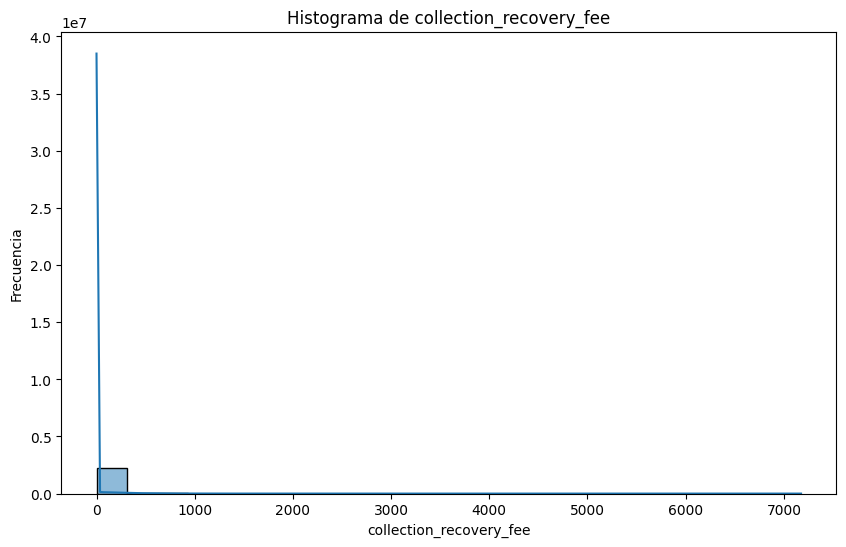

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['collection_recovery_fee'], kde=True)
plt.title('Histograma de collection_recovery_fee')
plt.xlabel('collection_recovery_fee')
plt.ylabel('Frecuencia')
plt.show()

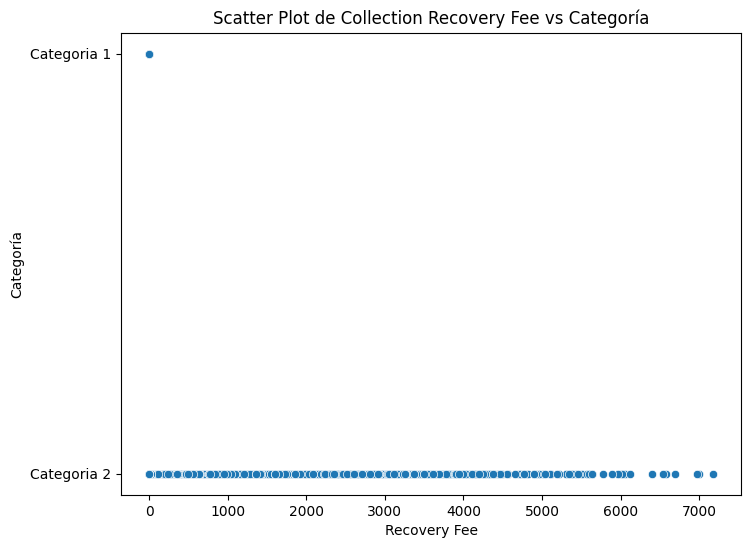

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='collection_recovery_fee', y='categoria', data=data)
plt.title('Scatter Plot de Collection Recovery Fee vs Categoría')
plt.xlabel('Recovery Fee')
plt.ylabel('Categoría')
plt.show()

In [ ]:
filtered_data = data[(data['categoria'] == 'Categoria 2') &
                     (data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']))]

total_recoveries = filtered_data['recoveries'].sum()

print(f"The sum of recoveries for Categoria 2 with specified loan statuses is: {total_recoveries}")

The sum of recoveries for Categoria 2 with specified loan statuses is: 304454867.7228929


In [ ]:
# Sumamos todos los valores de collection_recovery_fee que pertenezcan a la "Categoria 2" cuyo loan_status sea "charge off", "default" o "Does not meet the credit policy. Status:Charged Off"

filtered_data = data[(data['categoria'] == 'Categoria 2') &
                     (data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']))]

total_recovery_fee = filtered_data['collection_recovery_fee'].sum()

print(f"The sum of collection_recovery_fee for Categoria 2 with specified loan statuses is: {total_recovery_fee}")

The sum of collection_recovery_fee for Categoria 2 with specified loan statuses is: 50607667.08628377


In [ ]:
filtered_data = data[(data['categoria'] == 'Categoria 2') &
                     (data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']))]

total_saldoprestamo = filtered_data['SaldoPrestamo'].sum()

print(f"The sum of el saldo de los prestamos for Categoria 2 with specified loan statuses is: {total_saldoprestamo}")

The sum of el saldo de los prestamos for Categoria 2 with specified loan statuses is: 3454357834.610605


In [ ]:
filtered_data = data[(data['categoria'] == 'Categoria 2') &
                     (data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']))]

sum_total_a_pagarInicial = filtered_data['Total_a_pagar'].sum()

print(f"The sum of el monto que le prestaron for Categoria 2 with specified loan statuses is: {sum_total_a_pagarInicial}")

The sum of el monto que le prestaron for Categoria 2 with specified loan statuses is: 5607815670.599998


In [ ]:
total_saldoprestamo-total_recoveries


3149902966.887712

In [ ]:
filtered_data = data[(data['categoria'] == 'Categoria 2') &
                     (data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']))]

sum_totalPayment = filtered_data['total_pymnt'].sum()

print(f"The sum of los pagos que han hecho for Categoria 2 with specified loan statuses is: {sum_totalPayment}")

The sum of collection_recovery_fee for Categoria 2 with specified loan statuses is: 2153457835.989396


In [ ]:
print("El banco prestó un total de", sum_total_a_pagarInicial)
print("Los clientes, en condiciones normales, pagaron un total de", sum_totalPayment)
print("En condiciones normales el banco no cobró un porcentaje de", (sum_total_a_pagarInicial-sum_totalPayment)/sum_total_a_pagarInicial*100)
print("El banco recuperó un total de", total_recoveries)
print("El banco recuperó un porcentaje de", total_recoveries/sum_total_a_pagarInicial*100)
print("Sobre la deuda inicial, el banco ha recuperado", sum_totalPayment+total_recoveries)
print("El banco para recuperar ese porcentaje, tuvo que pagar", total_recovery_fee, "que representa en porcentaje a", total_recovery_fee/total_recoveries)
print("Al banco aún le queda por recuperar", sum_total_a_pagarInicial-sum_totalPayment-total_recoveries)
print("Esto equivale al % de lo que prestó", (sum_total_a_pagarInicial-(sum_totalPayment+total_recoveries))/sum_total_a_pagarInicial*100)




El banco prestó un total de 5607815670.599998
Los clientes, en condiciones normales, pagaron un total de 2153457835.989396
En condiciones normales el banco no cobró un porcentaje de 61.59899036483504
El banco recuperó un total de 304454867.7228929
El banco recuperó un porcentaje de 5.429116889826699
Sobre la deuda inicial, el banco ha recuperado 2457912703.712289
El banco para recuperar ese porcentaje, tuvo que pagar 3454357834.610605 que representa en porcentaje a 11.346042388636315
Al banco aún le queda por recuperar 3149902966.8877096
Esto equivale al % de lo que prestó 56.16987347500834


In [ ]:
# Veamos cuántos clientes son de la  "Categoria 2" cuyo loan_status sea "charge off" "default" o "Does not meet the credit policy. Status:Charged Off"

filtered_data = data[(data['categoria'] == 'Categoria 2') &
                     (data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']))]

num_clients = len(filtered_data)

print(f"The number of clients in 'Categoria 2' with loan statuses 'Charged Off', 'Default', or 'Does not meet the credit policy. Status:Charged Off' is: {num_clients}")

The number of clients in 'Categoria 2' with loan statuses 'Charged Off', 'Default', or 'Does not meet the credit policy. Status:Charged Off' is: 260169


In [ ]:
# Vemos cuántos clientes son de la categoria 2

num_categoria_2 = len(data[data['categoria'] == 'Categoria 2'])
print(f"The number of clients in Categoria 2 is: {num_categoria_2}")

The number of clients in Categoria 2 is: 281912


In [ ]:
num_clients/num_categoria_2*100


92.28730951502597

In [ ]:
(sum_total_a_pagarInicial-(sum_totalPayment+total_recoveries))/sum_total_a_pagarInicial*100

56.16987347500834

In [ ]:
# Porcentaje de total_saldoprestamo y sum_total_a_pagar

# Calculate the percentage relationship
percentage_relationship = (total_saldoprestamo / sum_total_a_pagar) * 100

print(f"The percentage relationship between total loan balance and sum_total_a_pagar is: {percentage_relationship:.2f}%")

The percentage relationship between total loan balance and sum_total_a_pagar is: 38.40%


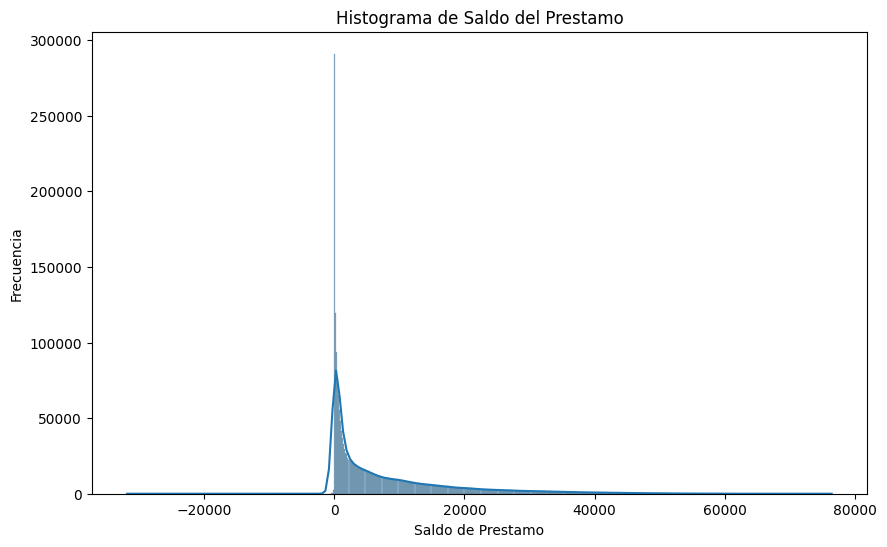

In [ ]:
# Histograma de la variable SaldoPrestamo (loan_amnt-total_Total_a_pagar)

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data['SaldoPrestamo'], kde=True)
plt.title('Histograma de Saldo del Prestamo')
plt.xlabel('Saldo de Prestamo')
plt.ylabel('Frecuencia')
plt.show()

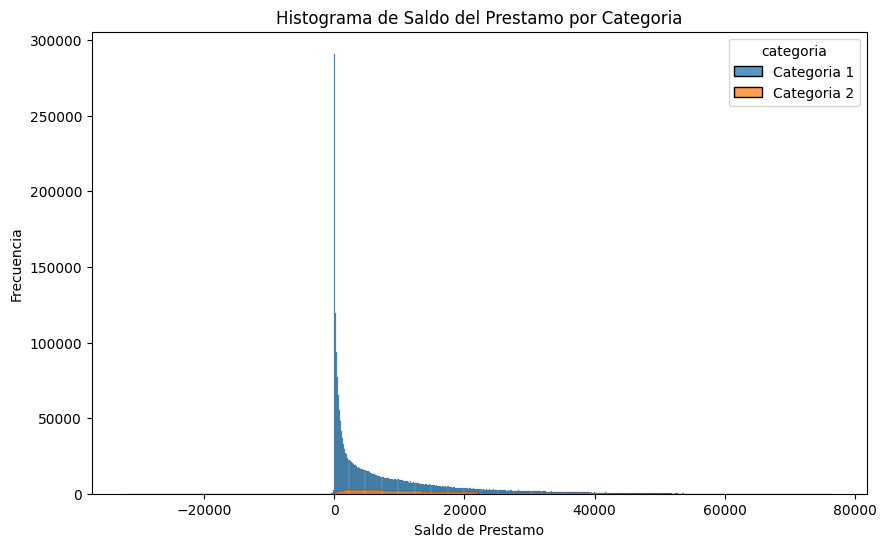

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SaldoPrestamo', data=data, hue='categoria', multiple="stack")
plt.title('Histograma de Saldo del Prestamo por Categoria')
plt.xlabel('Saldo de Prestamo')
plt.ylabel('Frecuencia')
plt.show()

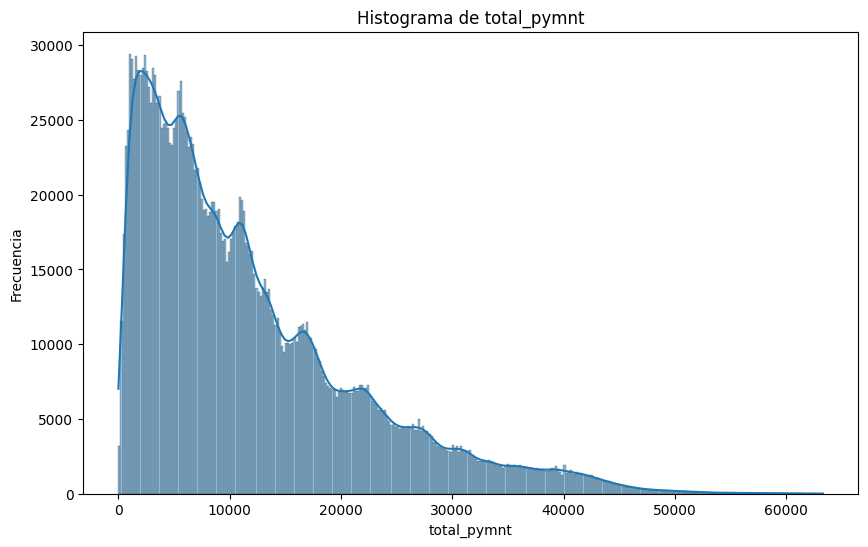

In [ ]:
# prompt: quiero un histograma de la variable total_paymnt

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'malospagadores' DataFrame is already loaded as in your provided code.

plt.figure(figsize=(10, 6))
sns.histplot(data['total_pymnt'], kde=True)
plt.title('Histograma de total_pymnt')
plt.xlabel('total_pymnt')
plt.ylabel('Frecuencia')
plt.show()

La variable total_pymnt presenta una alta concentración en pagos bajos con pocos valores extremos elevados. Este comportamiento es típico de productos financieros donde la mayoría de los clientes pagan montos moderados, mientras que pagos muy altos son menos frecuentes.

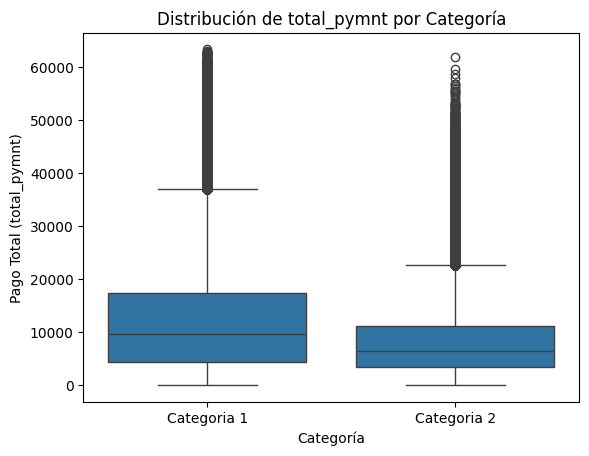

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja comparativo
sns.boxplot(x='categoria', y='total_pymnt', data=data)
plt.title('Distribución de total_pymnt por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Pago Total (total_pymnt)')
plt.show()

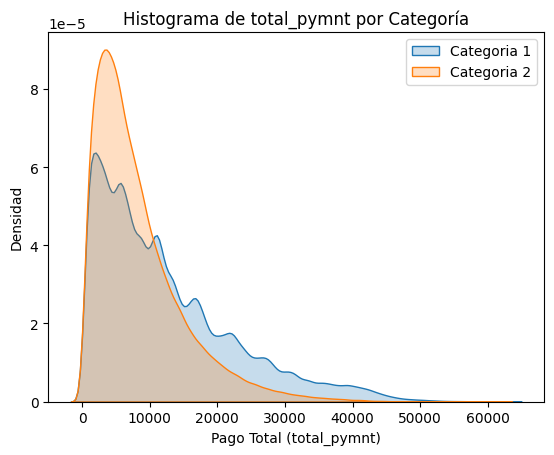

In [ ]:
# Histograma de pagos totales por categoría
sns.kdeplot(data=data[data['categoria'] == 'Categoria 1']['total_pymnt'], label='Categoria 1', fill=True)
sns.kdeplot(data=data[data['categoria'] == 'Categoria 2']['total_pymnt'], label='Categoria 2', fill=True)
plt.title('Histograma de total_pymnt por Categoría')
plt.xlabel('Pago Total (total_pymnt)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [ ]:
data.groupby('categoria')['total_pymnt'].describe()

,count,mean,std,min,25%,50%,75%,max
categoria,,,,,,,,
Categoria 1,1976284.0,12336.856361,10163.229601,0.0,4470.21,9652.092242,17468.148067,63296.877868
Categoria 2,281912.0,8320.084310,6712.233964,10.0,3510.68,6514.215000,11185.977500,61947.529797


Los clientes de Categoria 1 tienen un mejor desempeño en pagos totales, tanto en promedio como en los percentiles, lo que los hace más confiables. La Categoria 2 tiene pagos totales más bajos en general, con una mayor concentración en valores cercanos al mínimo, indicando una mayor probabilidad de incumplimientos. Este análisis confirma que los clientes buenos pagadores tienen un mejor desempeño en términos de pagos totales, lo que podría estar relacionado con un mejor manejo de sus deudas o una mayor capacidad de pago. Los clientes malos pagadores se concentran en valores bajos de pagos totales, lo que puede deberse a incumplimientos significativos.